### Understanding AutoPipeline in Diffusers

Diffusers offers a wide range of pipelines for generating images, videos, audio, inpainting, and more specialized tasks like upscaling and super-resolution. With so many pipelines available, it can be tricky to know which one to use for a specific task. 

**Enter the AutoPipeline class!** This class is designed to simplify your workflow by letting you focus on the task at hand without worrying about the specific pipeline class. AutoPipeline automatically detects and uses the correct pipeline class for your task, whether it’s generating text-to-image, image-to-image, or inpainting.

#### How AutoPipeline Works

Let’s look at an example using the `dreamlike-art/dreamlike-photoreal-2.0` checkpoint. Here’s what happens under the hood:

1. **Model Detection**: AutoPipeline identifies the model type (e.g., "stable-diffusion") from the `model_index.json` file.
2. **Pipeline Loading**: Depending on your task, it loads the appropriate pipeline class:
    - `StableDiffusionPipeline`
    - `StableDiffusionImg2ImgPipeline`
    - `StableDiffusionInpaintPipeline`
3. **Parameter Handling**: Any parameters you would pass to these specific pipelines can also be passed to AutoPipeline.

Here’s how you can use AutoPipeline for a text-to-image task:

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


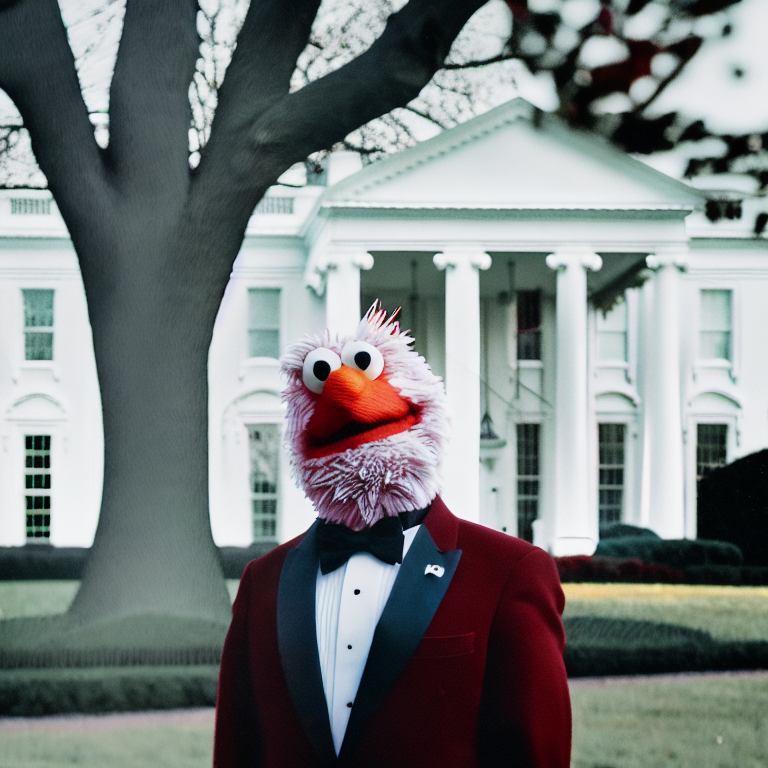

In [1]:
 
from diffusers import AutoPipelineForText2Image
import torch

# Load the pipeline
pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

# Define the prompt and generator
prompt = "cinematic photo of Elmo as the president of the United States in front of the white house, 35mm photograph, film, professional, 4k, highly detailed"
generator = torch.Generator(device="cuda").manual_seed(37)

# Generate the image
image = pipe_txt2img(prompt, generator=generator).images[0]
image
 

In this example, AutoPipeline automatically detects and uses the `StableDiffusionPipeline` for text-to-image generation.

#### Handling Unsupported Checkpoints

AutoPipeline supports a variety of checkpoints, including Stable Diffusion, Stable Diffusion XL, ControlNet, Kandinsky 2.1, Kandinsky 2.2, and DeepFloyd IF. If you try to load an unsupported checkpoint, you’ll encounter an error.

For instance, attempting to use the `openai/shap-e-img2img` checkpoint will result in the following error:

In [2]:
 
from diffusers import AutoPipelineForImage2Image
import torch

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "openai/shap-e-img2img", torch_dtype=torch.float16, use_safetensors=True
)

model_index.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

ValueError: AutoPipeline can't find a pipeline linked to ShapEImg2ImgPipeline for None

This will raise a ValueError

Thus in order to use this pipeline, you would need to specify DiffusionPipeline

AutoPipeline simplifies working with multiple pipelines, ensuring you can focus on your creative tasks without getting bogged down by the specifics of pipeline classes.